# Սրտի հիվանդության դասակարգում

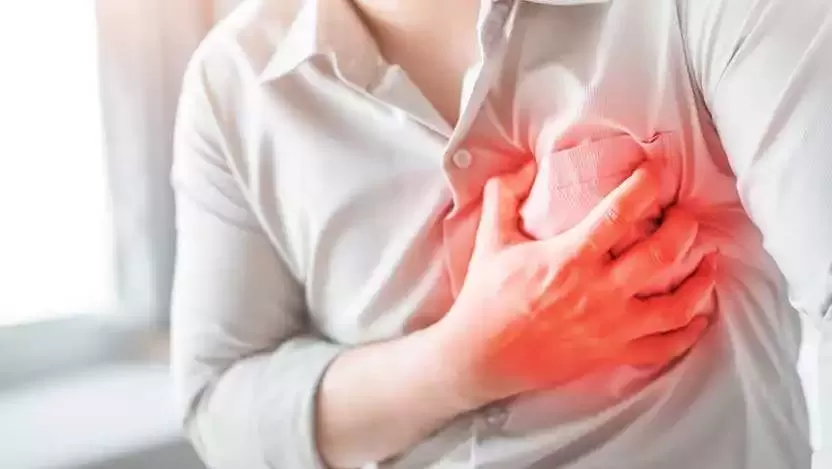

## Ներմուծենք անհրաժեշտ գրադարանները և բեռնենք տվյալերը


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score


In [ ]:
dataset = pd.read_csv('/content/sample_data/heart (3) (1).csv')
dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [ ]:
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values
print(X)
print(y)

[[52.  1.  0. ...  2.  2.  3.]
 [53.  1.  0. ...  0.  0.  3.]
 [70.  1.  0. ...  0.  0.  3.]
 ...
 [47.  1.  0. ...  1.  1.  2.]
 [50.  0.  0. ...  2.  0.  2.]
 [54.  1.  0. ...  1.  1.  3.]]
[0 0 0 ... 0 1 0]


## Բաժանենք տվյալները, ստանդարտացնենք

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Կիրառենք SVC մոդելը

In [ ]:
from sklearn.svm import SVC
classifier=SVC(kernel='linear', random_state=0 )
classifier.fit(X_train, y_train)

NameError: name 'X_train' is not defined

In [ ]:
y_pred = classifier.predict(X_test)
print(y_pred)

[1 1 0 1 0 0 0 0 0 1 1 0 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0 0
 0 1 1 1 1 1 1 1 1 1 1 0 1 0 0 0 1 0 0 0 1 0 1 0 1 1 1 0 0 0 1 1 1 1 1 1 0
 0 0 1 0 0 0 0 0 1 1 1 0 1 0 1 0 0 0 1 1 1 0 1 0 1 1 1 1 1 0 0 1 0 1 0 1 1
 1 0 0 0 0 1 0 0 1 1 1 1 0 1 1 1 1 1 0 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0
 1 0 1 1 1 0 0 0 1 1 0 0 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 0 0 0 0 0 1
 0 1 0 0 0 0 1 1 1 0 1 1 1 1 0 1 1 1 0 1 1 1 1 1 0 1 1 1 1 0 0 1 0 0 1 0 1
 1 0 1 0 0 1 1 0 0 0 1 0 1 0 1 1 0 0 0 0 0 0 1 1 0 1 0 1 1 0 1 1 1 0 1]


In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

NameError: name 'y_test' is not defined

conf_matrix = np.array([[99, 24], [12, 122]])
labels = ['Negative', 'Positive']
plt.figure(figsize=(7, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)

plt.xlabel('Predicted')
plt.ylabel('Ground truth')
plt.title('Confusion Matrix')


plt.show()

In [ ]:
#from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

classes = dataset['target'].unique()
#from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
disp.plot()

# Փոփոխում ենք լեյբլները
plt.xlabel()
plt.ylabel("Ground truth")
plt.title("Confusion Matrix with Ground Truth")
plt.show()


NameError: name 'confusion_matrix' is not defined

## Դասակարգչի գնահատման մետրիկաներ

In [ ]:
from sklearn.metrics import classification_report,accuracy_score

In [ ]:
print(accuracy_score(y_test,y_pred))

0.8599221789883269


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.80      0.85       123
           1       0.84      0.91      0.87       134

    accuracy                           0.86       257
   macro avg       0.86      0.86      0.86       257
weighted avg       0.86      0.86      0.86       257

